### Importing libraries and packages ###

In [1]:
# GUI Libraries
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog

In [2]:
# Data Manipulation and Visualization Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import geopandas and descartes for plotting maps
import geopandas as gpd
import descartes

In [3]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier

In [4]:
# System and Miscellaneous Libraries
import time
from datetime import datetime
from random import randint
from matplotlib.colors import rgb2hex, Normalize
from matplotlib import rcParams

In [5]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from statsmodels.tsa.seasonal import seasonal_decompose

### Data Loading and Exploration ###

In [6]:
# Load seismic data from CSV file
databasex = pd.read_csv('/content/database.csv')

In [7]:
# Print information about the databasex
print("Dataset Information:")
print(databasex.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal

In [8]:
# Display column names
print("Column Names:")
print(databasex.columns)

Column Names:
Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')


In [9]:
# Display the first few rows of the dataset
print("First Few Rows:")
print(databasex.head())

First Few Rows:
         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1   

In [10]:
# Display the last few rows of the dataset
print("Last Few Rows:")
print(databasex.tail())

Last Few Rows:
             Date      Time  Latitude  Longitude        Type  Depth  \
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake  12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake   8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake  10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake  79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake  11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
23407                 

In [11]:
# Count the occurrences of each volcano type
print("Count of Volcano Types:")
print(databasex['Type'].value_counts())

Count of Volcano Types:
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64


### Data Visualization ###

In [12]:
# Define a function to plot earthquake locations on a map
def plot_map(Longitude, Latitude):
    # Create a GeoDataFrame from the earthquake data
    gdf = gpd.GeoDataFrame(
        databasex,
        geometry=gpd.points_from_xy(databasex['Longitude'], databasex['Latitude'])
    )

    # Create the Geopandas plot
    fig, ax = plt.subplots(figsize=(16, 8))
    gdf.plot(ax=ax, markersize=5, color='red', alpha=0.7)

    # Set the plot title and axis labels
    plt.title('Volcanoes of the World', color='#000000', fontsize=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()


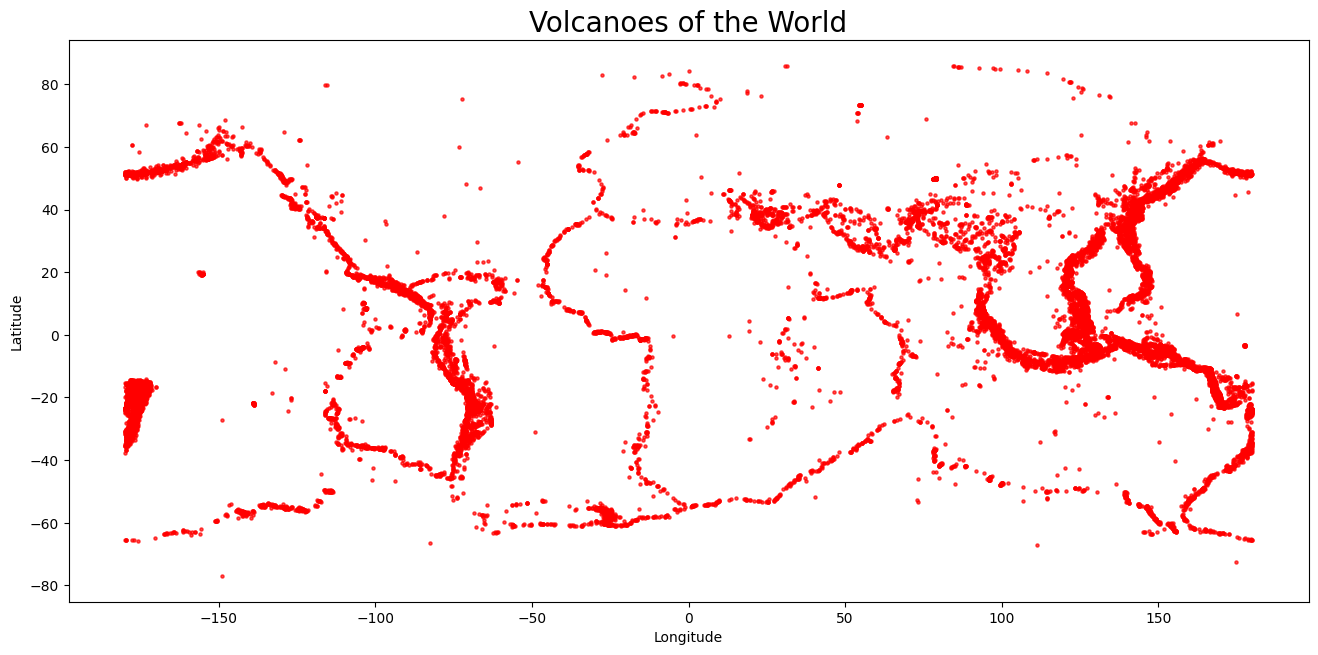

In [13]:
# Plot earthquakes on a map using longitude and latitude data
plot_map(databasex['Longitude'], databasex['Latitude'])

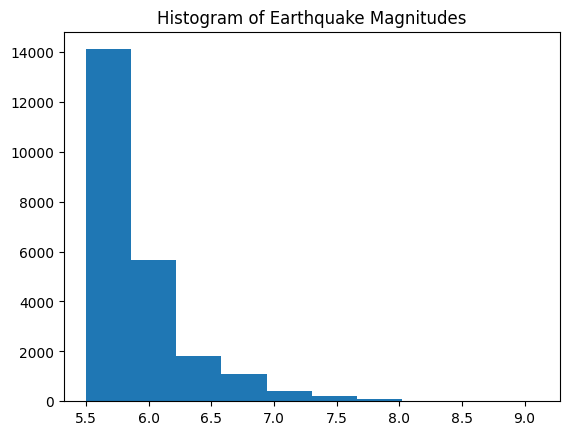

In [14]:
# Visualize the distribution of volcano magnitudes
plt.hist(databasex['Magnitude'])
plt.title("Histogram of Earthquake Magnitudes")
plt.show()

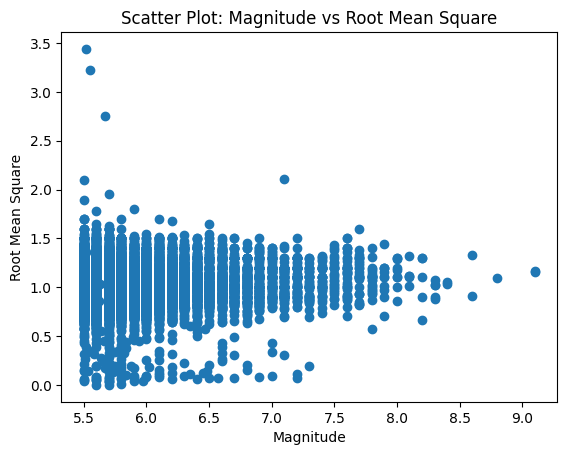

In [15]:
# Create a scatter plot of magnitudes against the root mean square
plt.scatter(databasex['Magnitude'], databasex['Root Mean Square'])
plt.title("Scatter Plot: Magnitude vs Root Mean Square")
plt.xlabel('Magnitude')
plt.ylabel('Root Mean Square')
plt.show()

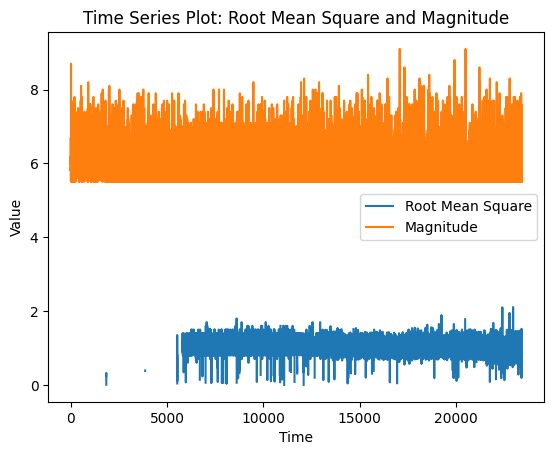

In [16]:
# Plot time series data of root mean square and magnitude
plt.plot(databasex['Root Mean Square'], label='Root Mean Square')
plt.plot(databasex['Magnitude'], label='Magnitude')
plt.title("Time Series Plot: Root Mean Square and Magnitude")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Machine Learning ###

#### Preprocessing and Feature Engineering

In [17]:
# Fill missing values with 0
databasex.fillna(0, inplace=True)

In [18]:
# Select relevant features for the model
databasex = databasex[['Latitude', 'Longitude', 'Magnitude', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']]

In [19]:
# Prepare the feature matrix X and the target vector Y
X = databasex.values
Y = []
for i in range(len(X)):
    m = X[i, 2]
    if m < 6.0:
        Y.append(1)  # Class 1: with magnitude less than 6.0
    else:
        Y.append(0)  # Class 0: with magnitude greater or equal to 6.0

In [20]:
# Convert the target list to a numpy array
Y = np.asarray(Y)

# Normalize the feature matrix X
X = normalize(X)

In [21]:
# Shuffle the data and split into training and testing sets
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
# Model Training and Evaluation

# Train a Support Vector Machine (SVM) classifier
svm_cls = svm.SVC(C=1.5, gamma='scale')
svm_cls.fit(X_train, y_train)
prediction_data = svm_cls.predict(X_test)
svm_acc = accuracy_score(y_test, prediction_data) * 100
print("Support Vector Machine (SVM) Accuracy:", svm_acc)

Support Vector Machine (SVM) Accuracy: 68.43903480674781


In [23]:
# Train a Logistic Regression classifier
lr_cls = LogisticRegression()
lr_cls.fit(X_train, y_train)
prediction_data = lr_cls.predict(X_test)
lr_acc = accuracy_score(y_test, prediction_data) * 100
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 68.28955797565663


In [24]:
# Train a Random Forest classifier
rf_cls = RandomForestClassifier(n_estimators=20, random_state=0)
rf_cls.fit(X_train, y_train)
prediction_data = rf_cls.predict(X_test)
rf_acc = accuracy_score(y_test, prediction_data) * 100
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 87.7642536835362


In [25]:
# Train a Gaussian Process classifier
gaussian_cls = GaussianProcessClassifier()
gaussian_cls.fit(X_test, y_test)
prediction_data = gaussian_cls.predict(X_test)
gaussian_acc = accuracy_score(y_test, prediction_data) * 100
print("Gaussian Process Accuracy:", gaussian_acc)

Gaussian Process Accuracy: 68.41768097373479


### Predictions and ROC Curve ###

In [26]:
# Load test data from CSV file
test = pd.read_csv('/content/philippinestest.csv')  # Update file path accordingly
test.fillna(0, inplace=True)
test = test[['Latitude', 'Longitude', 'Magnitude', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']]
test = test.values

In [27]:
# Make predictions using the trained model
y_pred = rf_cls.predict(test)

In [28]:
# Print predictions for each data point
for i in range(len(test)):
    if str(y_pred[i]) == '0':
        print("X=%s, Predicted = %s" % (test[i], 'No Eruption Activity Detected') + "\n\n")
    else:
        print("X=%s, Predicted = %s" % (test[i], 'Eruption Activity Detected at Given Time') + "\n\n")

X=[  6.7693 125.1011   6.       0.       7.1      1.39  ], Predicted = Eruption Activity Detected at Given Time


X=[ 13.82   120.6539   6.3      0.       5.8      0.75  ], Predicted = Eruption Activity Detected at Given Time


X=[  8.7572 126.2914   6.       0.       6.2      0.99  ], Predicted = Eruption Activity Detected at Given Time


X=[  6.2693 125.8285   6.3      0.       7.2      1.22  ], Predicted = Eruption Activity Detected at Given Time


X=[ 12.0257 124.1272   6.6      0.       7.1      0.73  ], Predicted = Eruption Activity Detected at Given Time


X=[  7.2932 124.1331   6.4      0.       7.4      1.04  ], Predicted = Eruption Activity Detected at Given Time


X=[  6.6969 125.1739   6.8      0.       8.       1.05  ], Predicted = Eruption Activity Detected at Given Time




In [29]:
# Calculate and plot the ROC curve for each trained model
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_cls.predict(X_test))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_cls.predict(X_test))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_cls.predict(X_test))
g_fpr, g_tpr, _ = roc_curve(y_test, gaussian_cls.predict(X_test))

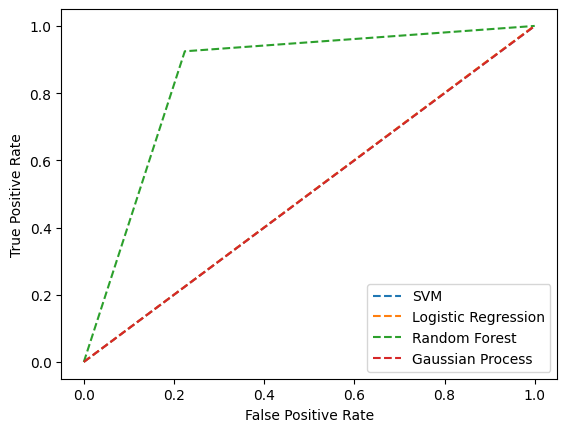

In [30]:
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest')
plt.plot(g_fpr, g_tpr, linestyle='--', label='Gaussian Process')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

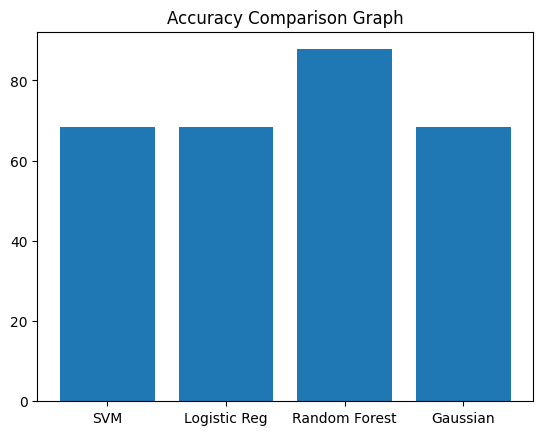

In [31]:
# Accuracy Comparison Graph
height = [svm_acc, lr_acc, rf_acc, gaussian_acc]
bars = ('SVM', 'Logistic Reg', 'Random Forest', 'Gaussian')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title('Accuracy Comparison Graph')
plt.show()